In [22]:
import pandas as panda
from matplotlib import pyplot as plt
import matplotlib.dates as mdates

In [23]:
"""
Collecting the data from Ruter_data.csv
Reading only the date col and Passasjerer_Ombord as this is what we will 
use in our visualization
"""

data = panda.read_csv("Ruter_data.csv",";",usecols=[1,16])

In [24]:
"""Checking a sample of the first 5 rows"""

data.head(5)

,Dato,Passasjerer_Ombord
0,10/08/2020,5
1,15/08/2020,5
2,03/08/2020,6
3,27/07/2020,10
4,27/08/2020,10


In [25]:
"""
Defining a lower limit for the number of passengers onboard
Note that this will reduce the number of rows in our new dataset 
"""

lower_limit = 0

In [26]:
""" Defining a new dataset with only the rows where the number of passengers is > 0 """

new_data = data[data.Passasjerer_Ombord>lower_limit]

In [27]:
""" We compare the number of rows in our two datasets """

data.shape, new_data.shape

((6000, 2), (4376, 2))

In [28]:
"""Checking the new dataset"""

new_data

,Dato,Passasjerer_Ombord
0,10/08/2020,5
1,15/08/2020,5
2,03/08/2020,6
3,27/07/2020,10
4,27/08/2020,10
...,...,...
5993,30/08/2020,5
5995,10/06/2020,2
5996,23/06/2020,2
5997,11/06/2020,3


In [29]:
"""Formating the Dato-col to datetime, using pandas to_datetime()"""

new_data.loc[:,"Dato"] = panda.to_datetime(data.Dato)

C:\Users\benja\anaconda3\envs\dave3625\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [30]:
"""Sorting the data by Dato"""

new_data.sort_values(by='Dato')

,Dato,Passasjerer_Ombord
1886,2020-01-06,4
4278,2020-01-06,14
762,2020-01-06,3
2509,2020-01-06,2
4288,2020-01-06,8
...,...,...
1102,2020-12-08,16
2586,2020-12-08,5
2428,2020-12-08,1
1216,2020-12-08,11


In [31]:
"""Grouping by Dato and using the mean value"""

data1 = new_data.groupby('Dato').mean()
data1

,Passasjerer_Ombord
Dato,
2020-01-06,5.863636
2020-01-07,7.270833
2020-01-08,6.156863
2020-02-06,7.029412
2020-02-07,7.326923
...,...
2020-11-07,9.071429
2020-11-08,8.222222
2020-12-06,7.844444


<AxesSubplot:xlabel='Dato'>

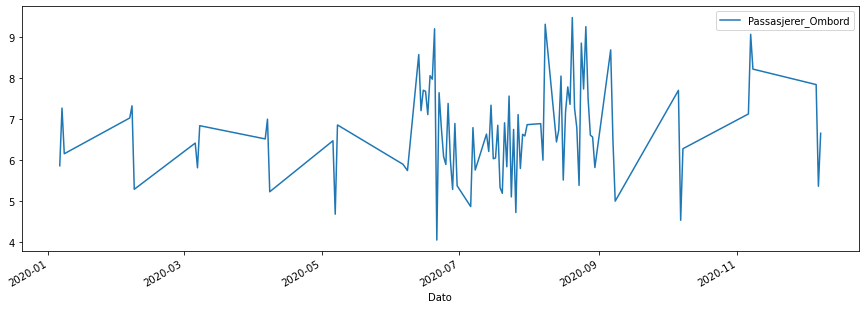

In [32]:
"""Plot the set with Dato as the x-axis and avg number of passengers as y-axis"""

data1.plot.line(figsize=(15,5))

<AxesSubplot:ylabel='Frequency'>

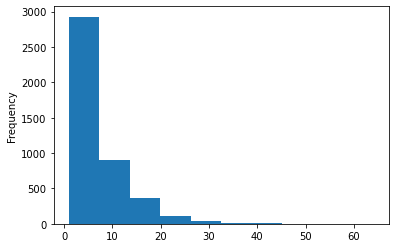

In [33]:
"""A histogram showing the frequency of Passasjerer_Ombord"""

new_data['Passasjerer_Ombord'].plot.hist()